In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.rcParams['font.family'] = 'NanumGothicCoding'

# 데이터 전처리

# 시군구별 화재 건수 비교

In [31]:
# 해결 1: CP949 (Windows에서 많이 사용)
df = pd.read_csv('10년_통합_화재.csv', encoding='cp949')
df = df.dropna()

In [33]:
# 1. 화재발생년원일을 datetime 형식으로 변환
df['화재발생년원일'] = pd.to_datetime(df['화재발생년원일'], errors='coerce')

# 2. 2023년도 데이터만 추출
df_2023 = df[df['화재발생년원일'].dt.year == 2023]

# 3. 월별·일별 범위 확인
# 월 범위
months_present = df_2023['화재발생년원일'].dt.month.unique()
months_present.sort()
print('2023년도에 존재하는 월:', months_present)

# 일 범위
days_present = df_2023['화재발생년원일'].dt.day.unique()
days_present.sort()
print('2023년도에 존재하는 일:', days_present)


2023년도에 존재하는 월: [ 1  2  3  4  5  6  7  8  9 10 11 12]
2023년도에 존재하는 일: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [9]:
df['시군구'].value_counts()

시군구
서구        12050
중구         9689
북구         9574
동구         8298
남구         8012
          ...  
계룡시         279
영양군         275
부천시오정구      197
부천시소사구      144
울릉군         108
Name: count, Length: 235, dtype: int64

In [12]:
df

,화재발생년원일,시도,시군구,화재유형,발화요인대분류,발화요인소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류
0,2019-01-01 0:03,강원특별자치도,삼척시,기타(쓰레기 화재등),부주의,폭죽놀이,1,0,1,0,기타,야외,기타야외
1,2019-01-01 0:06,경기도,평택시,"건축,구조물",미상,미상,0,0,0,14900,주거,단독주택,단독주택
2,2019-01-01 0:40,서울특별시,성북구,"자동차,철도차량",미상,미상,0,0,0,3642,"자동차,철도차량",자동차,승용자동차
3,2019-01-01 0:52,경기도,이천시,기타(쓰레기 화재등),화학적 요인,자연발화,0,0,0,1848,기타,야외,야적장
4,2019-01-01 1:06,부산광역시,부산진구,"건축,구조물",전기적 요인,절연열화에 의한 단락,0,0,0,45,기타서비스,기타건축물,기타 건축물
...,...,...,...,...,...,...,...,...,...,...,...,...,...
523500,2015-12-31 22:39,서울특별시,강남구,"건축,구조물",미상,미상,0,0,0,59142,교육시설,"연구,학원",외국어학원
523501,2015-12-31 23:01,경상북도,청도군,"건축,구조물",전기적 요인,미확인단락,0,0,0,9784,"판매,업무시설",판매시설,전통시장
523502,2015-12-31 23:35,강원도,양구군,"건축,구조물",전기적 요인,접촉불량에 의한 단락,0,0,0,0,주거,단독주택,다가구주택
523503,2015-12-31 23:42,충청북도,청주시서원구,"건축,구조물",기타,기타,0,0,0,2336,산업시설,동식물시설,기타 동식물시설


In [14]:
def f1(x):
    return x[:4]

df['화재발생년원일'] = df['화재발생년원일'].apply(f1)


,화재발생년원일,시도,시군구,화재유형,발화요인대분류,발화요인소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류
0,2019,강원특별자치도,삼척시,기타(쓰레기 화재등),부주의,폭죽놀이,1,0,1,0,기타,야외,기타야외
1,2019,경기도,평택시,"건축,구조물",미상,미상,0,0,0,14900,주거,단독주택,단독주택
2,2019,서울특별시,성북구,"자동차,철도차량",미상,미상,0,0,0,3642,"자동차,철도차량",자동차,승용자동차
3,2019,경기도,이천시,기타(쓰레기 화재등),화학적 요인,자연발화,0,0,0,1848,기타,야외,야적장
4,2019,부산광역시,부산진구,"건축,구조물",전기적 요인,절연열화에 의한 단락,0,0,0,45,기타서비스,기타건축물,기타 건축물
...,...,...,...,...,...,...,...,...,...,...,...,...,...
523500,2015,서울특별시,강남구,"건축,구조물",미상,미상,0,0,0,59142,교육시설,"연구,학원",외국어학원
523501,2015,경상북도,청도군,"건축,구조물",전기적 요인,미확인단락,0,0,0,9784,"판매,업무시설",판매시설,전통시장
523502,2015,강원도,양구군,"건축,구조물",전기적 요인,접촉불량에 의한 단락,0,0,0,0,주거,단독주택,다가구주택
523503,2015,충청북도,청주시서원구,"건축,구조물",기타,기타,0,0,0,2336,산업시설,동식물시설,기타 동식물시설


In [17]:
df['화재발생년원일'] = df['화재발생년원일'].astype(int)

In [23]:
df_hwaseong = df[df['시군구'] == '화성시'] 
df_hwaseong

,화재발생년원일,시도,시군구,화재유형,발화요인대분류,발화요인소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류
95,2019,경기도,화성시,기타(쓰레기 화재등),전기적 요인,미확인단락,0,0,0,220,기타,야외,야적장
172,2019,경기도,화성시,"건축,구조물",부주의,담배꽁초,0,0,0,783,산업시설,작업장,철공소
201,2019,경기도,화성시,"자동차,철도차량",기계적 요인,기타(기계적요인),0,0,0,220,"자동차,철도차량",자동차,화물자동차
202,2019,경기도,화성시,"건축,구조물",부주의,"불씨,불꽃,화원방치",0,0,0,1584,기타서비스,기타건축물,기타 건축물
371,2019,경기도,화성시,기타(쓰레기 화재등),부주의,쓰레기 소각,0,0,0,572,기타,야외,쓰레기
...,...,...,...,...,...,...,...,...,...,...,...,...,...
523154,2015,경기도,화성시,"자동차,철도차량",전기적 요인,미확인단락,0,0,0,13200,"자동차,철도차량",건설기계,기타 건설기계
523187,2015,경기도,화성시,"자동차,철도차량",미상,미상,0,0,0,396000,"자동차,철도차량",건설기계,기타 건설기계
523188,2015,경기도,화성시,기타(쓰레기 화재등),부주의,"용접, 절단, 연마",0,0,0,130,기타,야외,야적장
523424,2015,경기도,화성시,"건축,구조물",미상,미상,0,0,0,15914,생활서비스,음식점,한식


In [25]:
df_hwaseong = df_hwaseong[df_hwaseong['장소중분류'] == '공장시설']

In [30]:
df_hwaseong.groupby('화재발생년원일').size()

화재발생년원일
2015    152
2016    165
2017    145
2018    136
2019    256
2020    270
2021    284
2022    276
2023    115
dtype: int64

In [29]:
# 연도별 화재발생건수 계산
df_yearly_counts = df_hwaseong.groupby('화재발생년원일').size().reset_index(name='화재발생건수')

print(df_yearly_counts)

/tmp/ipykernel_33614/3336786462.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5.values, palette="pastel")


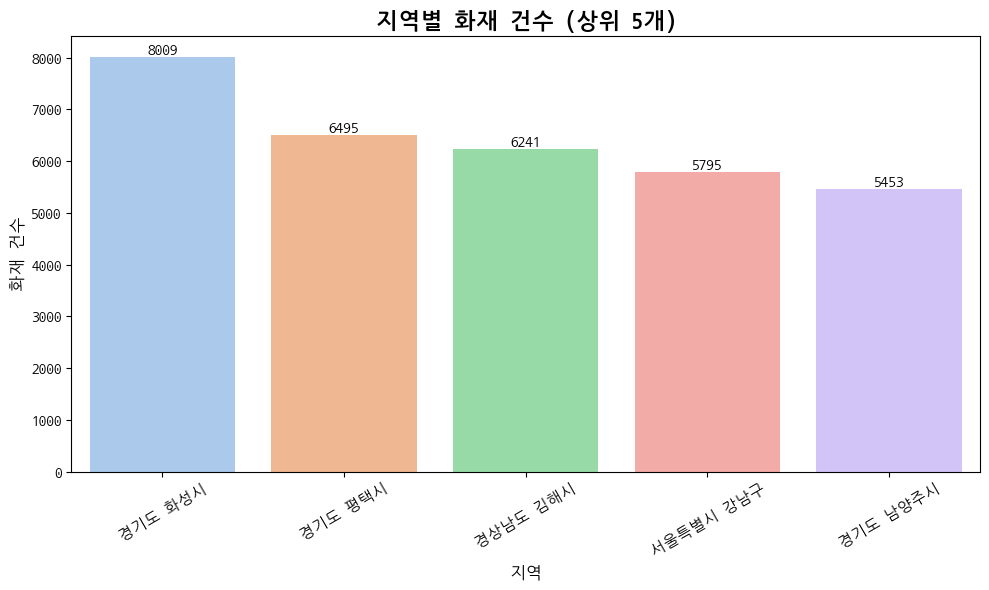

In [4]:
# 누락된 top5 재정의 및 시각화 재시도
import pandas as pd
import seaborn as sns

# 시도 + 시군구 결합
df['지역'] = df['시도'] + ' ' + df['시군구']
top5 = df['지역'].value_counts().head(5)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top5.index, y=top5.values, palette="pastel")

plt.title('지역별 화재 건수 (상위 5개)', fontsize=16, weight='bold')
plt.xlabel('지역', fontsize=12)
plt.ylabel('화재 건수', fontsize=12)
plt.xticks(rotation=30, ha = 'center', fontsize=11)
plt.yticks(fontsize=11)

# 바 위에 숫자 표시
for i, value in enumerate(top5.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


# 화성시 내 화재 장소 별 건수 비교

/tmp/ipykernel_134384/3619142743.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5.values, palette="pastel")


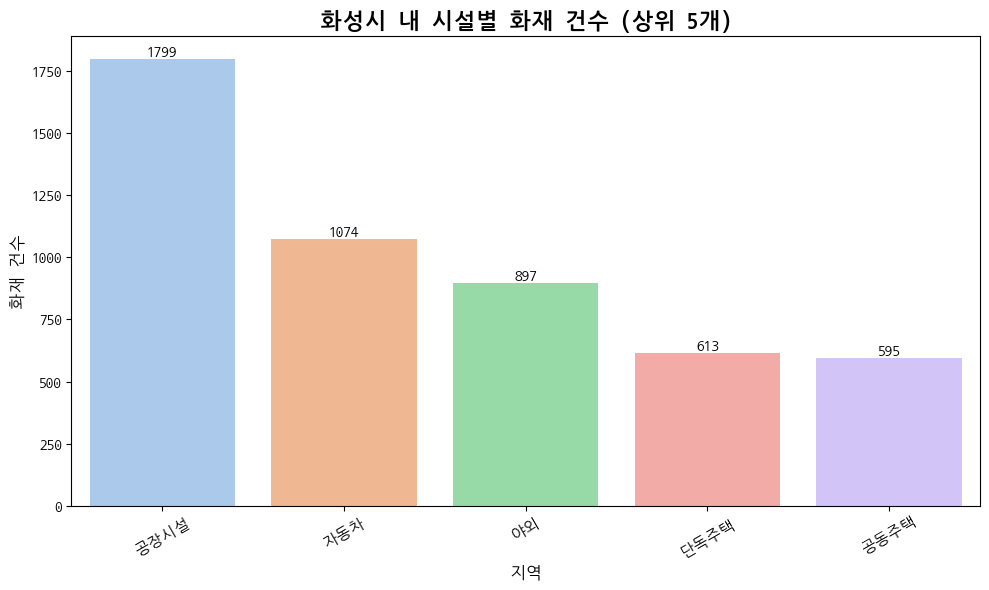

In [52]:
df_hwaseong = df[df['지역'] == '경기도 화성시']
top5 = df_hwaseong['장소중분류'].value_counts().head(5)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top5.index, y=top5.values, palette="pastel")

plt.title('화성시 내 시설별 화재 건수 (상위 5개)', fontsize=16, weight='bold')
plt.xlabel('지역', fontsize=12)
plt.ylabel('화재 건수', fontsize=12)
plt.xticks(rotation=30, ha = 'center', fontsize=11)
plt.yticks(fontsize=11)

# 바 위에 숫자 표시
for i, value in enumerate(top5.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()